<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/tf/SequentialAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Also refer to the FunctionalAPI notebook part 3; we are going to create that same model through the SequentialAPI.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [ ]:
history = model.fit(
  [X_train_A, X_train_B], [y_train, y_train], epochs=20,
  validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1687 - output_1_loss: 0.9842 - output_2_loss: 2.8293 - val_loss: 0.6531 - val_output_1_loss: 0.5670 - val_output_2_loss: 1.4280
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6154 - output_1_loss: 0.5342 - output_2_loss: 1.3458 - val_loss: 0.5853 - val_output_1_loss: 0.5127 - val_output_2_loss: 1.2385
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5649 - output_1_loss: 0.4966 - output_2_loss: 1.1797 - val_loss: 0.5602 - val_output_1_loss: 0.4974 - val_output_2_loss: 1.1258
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5495 - output_1_loss: 0.4946 - output_2_loss: 1.0442 - val_loss: 0.5303 - val_output_1_loss: 0.4793 - val_output_2_loss: 0.9889
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5095 - output_1_loss: 0.4638 - output_2_loss: 0.9204 - val_loss: 0.5157 - val_output_1_loss: 0.4752 - val_ou

In [ ]:
hist = pd.DataFrame(history.history)

hist.head()

,loss,output_1_loss,output_2_loss,val_loss,val_output_1_loss,val_output_2_loss
0,1.168694,0.984178,2.829338,0.653090,0.566994,1.427963
1,0.615376,0.534220,1.345774,0.585292,0.512709,1.238536
2,0.564950,0.496644,1.179705,0.560220,0.497381,1.125772
3,0.549540,0.494579,1.044191,0.530284,0.479329,0.988879
4,0.509473,0.463816,0.920382,0.515668,0.475239,0.879528


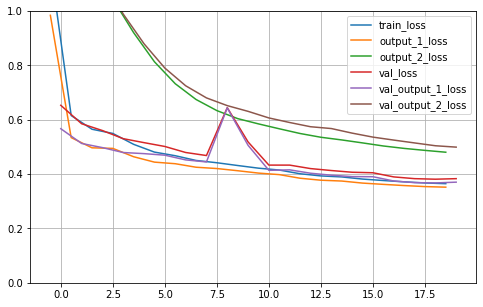

In [ ]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(hist["loss"]))
plt.plot(epochs - 0.5, hist["loss"], label="train_loss")
plt.plot(epochs - 0.5, hist["output_1_loss"], label="output_1_loss")
plt.plot(epochs - 0.5, hist["output_2_loss"], label="output_2_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.plot(epochs, hist["val_output_1_loss"], label="val_output_1_loss")
plt.plot(epochs, hist["val_output_2_loss"], label="val_output_2_loss")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()